In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import sys
sys.path.append('..')

In [2]:
aqua_modis_estimate = pd.read_pickle(f"data/OCEAN_terra_modl_aod_target.pkl")
aqua_modis_estimate.describe()

,mTau470,mTau550,mTau660,mTau870
count,36575.000000,36575.000000,36575.000000,36575.000000
mean,0.244015,0.202752,0.172508,0.130944
std,0.209796,0.188468,0.173607,0.154689
min,0.022000,0.022000,0.017000,0.008000
25%,0.118000,0.093000,0.075000,0.051000
50%,0.181000,0.145000,0.120000,0.086000
75%,0.299000,0.246000,0.207000,0.151000
max,5.014000,4.823000,4.710000,4.618000


In [3]:
aqua_y_test = pd.read_pickle('model_outputs/aqua_y_test.pkl')
aqua_y_test.describe()

,aTau470,aTau550,aTau660,aTau870
count,3359.000000,3359.000000,3359.000000,3359.000000
mean,0.022496,0.020852,0.017931,0.012182
std,0.991382,0.991251,0.991583,0.999631
min,-2.966015,-3.202452,-3.181109,-6.955210
25%,-0.702650,-0.669076,-0.667966,-0.658295
50%,0.023550,0.018693,0.004004,-0.002238
75%,0.750721,0.732633,0.709161,0.684957
max,3.200281,3.123235,2.999283,2.853992


In [4]:
aqua_mlp_out = pd.read_pickle('model_outputs/aqua_mlp_out.pkl')
aqua_mlp_out.describe()

,aTau470,aTau550,aTau660,aTau870
count,3359.000000,3359.000000,3359.000000,3359.000000
mean,0.007908,0.009545,0.011270,0.009898
std,0.913332,0.911742,0.907898,0.896941
min,-2.421524,-2.439445,-2.413162,-2.328324
25%,-0.663818,-0.644208,-0.629004,-0.636245
50%,-0.049129,-0.052054,-0.050614,-0.069980
75%,0.690716,0.684199,0.658136,0.617940
max,3.115074,3.033360,2.886084,2.891408


In [5]:
aqua_edl_out_np = np.load('model_outputs/aqua_edl_out.npy')
aqua_mu, aqua_v, aqua_alpha, aqua_beta = tf.split(aqua_edl_out_np, [4 for i in range(aqua_mlp_out.shape[1])], axis=-1)
aqua_var = np.sqrt(aqua_beta / (aqua_v * (aqua_alpha - 1)))
aqua_edl_out = pd.DataFrame(aqua_mu.numpy(), columns=aqua_mlp_out.columns)

2022-03-06 01:43:54.176186: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
from kde import calc_kde2d
from aod_models import plot_kde2d, plot_linregress, plot_linregress_diff

Starting the 2D kernel density estimation with 3359 data points...
Evaluating 2D kernel on grid with (Nx,Ny)=(256,256) ...
X, Y, P shapes:  (256, 256) (256, 256) (256, 256)


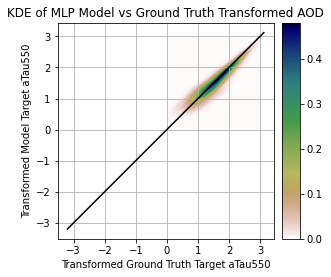

In [7]:
transformed_y_test = aqua_y_test.aTau550
transformed_modis_y_test_aod = aqua_mlp_out.aTau550
y_test_bins, out_bins_modis, P_modis = calc_kde2d(transformed_y_test, transformed_modis_y_test_aod)
plot_kde2d(y_test_bins, out_bins_modis, P_modis, Title='KDE of MLP Model vs Ground Truth Transformed AOD', xLabel='Transformed Ground Truth Target aTau550', yLabel='Transformed Model Target aTau550')

Starting the 2D kernel density estimation with 3359 data points...
Evaluating 2D kernel on grid with (Nx,Ny)=(256,256) ...
X, Y, P shapes:  (256, 256) (256, 256) (256, 256)


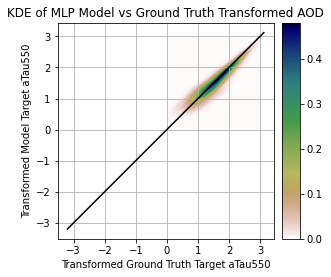

In [8]:
transformed_y_test = aqua_y_test.aTau550
transformed_out_df = aqua_mlp_out.aTau550
y_test_bins, out_bins, P = calc_kde2d(transformed_y_test, transformed_out_df)
plot_kde2d(y_test_bins, out_bins, P, Title='KDE of MLP Model vs Ground Truth Transformed AOD', xLabel='Transformed Ground Truth Target aTau550', yLabel='Transformed Model Target aTau550')

Starting the 2D kernel density estimation with 3359 data points...
Evaluating 2D kernel on grid with (Nx,Ny)=(256,256) ...
X, Y, P shapes:  (256, 256) (256, 256) (256, 256)


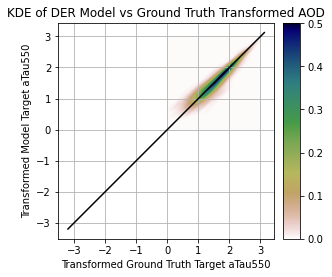

In [9]:
transformed_y_test = aqua_y_test.aTau550
transformed_out_edl_df = aqua_edl_out.aTau550
y_test_bins, out_edl_bins, P_edl = calc_kde2d(transformed_y_test, transformed_out_edl_df)
plot_kde2d(y_test_bins, out_edl_bins, P_edl, Title='KDE of DER Model vs Ground Truth Transformed AOD', xLabel='Transformed Ground Truth Target aTau550', yLabel='Transformed Model Target aTau550')

0.8523650873790996 -0.008228770482729741 0.9266954500876676 0.0 0.005966023410075501
0.9266954500876676


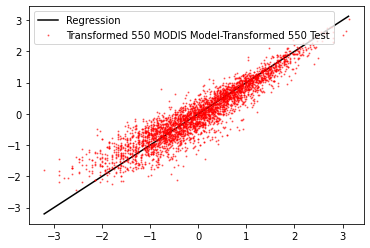

In [10]:
# MODIS lin reg
r = plot_linregress(transformed_y_test, transformed_modis_y_test_aod, np.linspace(transformed_y_test.min(), transformed_y_test.max()), 'Transformed 550 MODIS Model-Transformed 550 Test')
print(r)

0.8523650873790996 -0.008228770482729741 0.9266954500876676 0.0 0.005966023410075501
0.9266954500876676


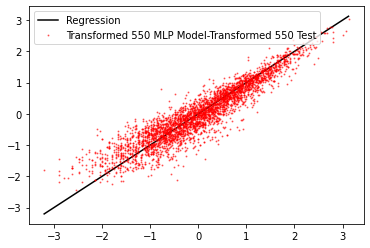

In [11]:
# MLP lin reg
r = plot_linregress(transformed_y_test, transformed_out_df, np.linspace(transformed_y_test.min(), transformed_y_test.max()), 'Transformed 550 MLP Model-Transformed 550 Test')
print(r)

0.8742839735252736 -0.01796405184062027 0.9275952482345056 0.0 0.006077287603973892
0.9275952482345056


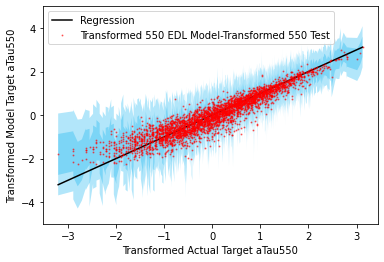

In [12]:
# EDL lin reg
n_stds = 4
std = np.minimum(np.sqrt(aqua_var), 1e3)
r = plot_linregress(transformed_y_test, transformed_out_edl_df, np.linspace(transformed_y_test.min(), transformed_y_test.max()), 'Transformed 550 EDL Model-Transformed 550 Test')
indices = np.argsort(transformed_y_test)
plt.fill_between(
    transformed_y_test[indices], (transformed_out_edl_df[indices] - std[indices][:,1]), (transformed_out_edl_df[indices] + std[indices][:,1]),
    alpha=0.3,
    edgecolor=None,
    facecolor='#00aeef',
    linewidth=0,
    zorder=1)
plt.fill_between(
    transformed_y_test[indices], (transformed_out_edl_df[indices] - 2*std[indices][:,1]), (transformed_out_edl_df[indices] + 2*std[indices][:,1]),
    alpha=0.3,
    edgecolor=None,
    facecolor='#00aeef',
    linewidth=0,
    zorder=1)
plt.xlabel('Transformed Actual Target aTau550')
plt.ylabel('Transformed Model Target aTau550')
plt.ylim([-5,5])
print(r)

0.8742839735252736 -0.01796405184062027 0.9275952482345056 0.0 0.006077287603973892
[-0.160338   -1.5741273  -0.0109331  ... -0.34003407 -0.03042492
 -0.91341114]
0.9275952482345056


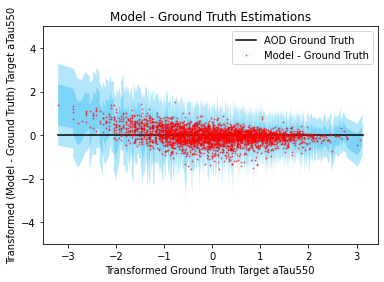

In [13]:
n_stds = 4
std = np.minimum(np.sqrt(aqua_var), 1e3)
r = plot_linregress_diff(transformed_y_test.values, transformed_out_edl_df.values, np.linspace(transformed_y_test.min(), transformed_y_test.max()))
indices = np.argsort(transformed_y_test)
plt.fill_between(
    transformed_y_test[indices], (transformed_out_edl_df[indices] - std[indices][:,1] - transformed_y_test[indices].values), (transformed_out_edl_df[indices] + std[indices][:,1] - transformed_y_test[indices].values),
    alpha=0.3,
    edgecolor=None,
    facecolor='#00aeef',
    linewidth=0,
    zorder=1)
plt.fill_between(
    transformed_y_test[indices], (transformed_out_edl_df[indices] - 2*std[indices][:,1] - transformed_y_test[indices].values), (transformed_out_edl_df[indices] + 2*std[indices][:,1] - transformed_y_test[indices].values),
    alpha=0.3,
    edgecolor=None,
    facecolor='#00aeef',
    linewidth=0,
    zorder=1)
plt.xlabel('Transformed Ground Truth Target aTau550')
plt.ylabel('Transformed (Model - Ground Truth) Target aTau550')
plt.legend(loc='best')
plt.ylim([-5,5])
print(r)